In [1]:
import pandas as pd
import numpy as np

## Data Cleaning

In [2]:
all_shots = pd.read_csv("data/NBA_2004_2023_Shots.csv")

In [3]:
season_shots = pd.read_csv("data/shot_logs.csv")

In [4]:
season_shots.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [5]:
all_shots.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012561 entries, 0 to 4012560
Data columns (total 26 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   SEASON_1        4012561 non-null  int64  
 1   SEASON_2        4012561 non-null  object 
 2   TEAM_ID         4012561 non-null  int64  
 3   TEAM_NAME       4012561 non-null  object 
 4   PLAYER_ID       4012561 non-null  int64  
 5   PLAYER_NAME     4012561 non-null  object 
 6   POSITION_GROUP  4005895 non-null  object 
 7   POSITION        4005895 non-null  object 
 8   GAME_DATE       4012561 non-null  object 
 9   GAME_ID         4012561 non-null  int64  
 10  HOME_TEAM       4012561 non-null  object 
 11  AWAY_TEAM       4012561 non-null  object 
 12  EVENT_TYPE      4012561 non-null  object 
 13  SHOT_MADE       4012561 non-null  bool   
 14  ACTION_TYPE     4012561 non-null  object 
 15  SHOT_TYPE       4012561 non-null  object 
 16  BASIC_ZONE      4012561 non-null  ob

In [6]:
all_shots["POSITION"].value_counts()

POSITION
SG          935548
PG          843538
PF          783132
SF          729954
C           634352
SF-SG        15451
SG-PG        11413
PG-SG        11325
PF-SF         8957
SG-SF         7595
SF-PF         7128
PF-C          6503
C-PF          6464
SG-PF         3326
PG-SF          952
SG-PG-SF       191
SF-C            66
Name: count, dtype: int64

In [7]:
all_shots["POSITION_GROUP"].value_counts()

POSITION_GROUP
G    1813888
F    1551191
C     640816
Name: count, dtype: int64

In [8]:
# Players with position nan
all_shots["PLAYER_NAME"][all_shots["POSITION"].isna()].value_counts()

PLAYER_NAME
OG Anunoby            1782
O.G. Anunoby          1635
Jeffery Taylor         730
P.J. Dozier            634
Xavier Tillman Sr.     515
T.J. Leaf              415
Xavier Tillman         306
Vitor Faverani         147
AJ Green               125
Charlie Brown Jr.      101
Cam Reynolds            96
Jeff Dowtin Jr.         57
John Butler Jr.         53
Michael Frazier II      29
Jeff Dowtin             26
Trevon Scott             6
Chance Comanche          5
M.J. Walker              4
Name: count, dtype: int64

In [9]:
# Positions were fixed based on data from https://www.basketball-reference.com/
pos_dict = {
    "OG Anunoby": "SF",
    "O.G. Anunoby": "SF",
    "Jeffery Taylor": "SF",
    "P.J. Dozier": "SG-SF-PG",
    "T.J. Leaf": "PF",
    "Xavier Tillman Sr.": "PF-C",
    "Xavier Tillman": "PF-C",
    "Vitor Faverani": "C",
    "AJ Green": "SG",
    "Charlie Brown Jr.": "SG",
    "Cam Reynolds": "SF-SG",
    "Jeff Dowtin Jr.": "PG",
    "John Butler Jr.": "C",
    "Michael Frazier II": "SG",
    "Jeff Dowtin": "PG",
    "Trevon Scott": "SF",
    "Chance Comanche": "C",
    "M.J. Walker": "SG",
}

for player, position in pos_dict.items():
    all_shots.loc[all_shots["PLAYER_NAME"] == player, "POSITION"] = position
    all_shots.loc[all_shots["PLAYER_NAME"] == player, "POSITION_GROUP"] = position[-1]

In [10]:
# stats for number of shots per player, for players attempted more than thres shots
thres = 0
shots_per_player = all_shots["PLAYER_ID"].value_counts()
shots_per_player[all_shots["PLAYER_ID"].value_counts() > thres].describe()

count     2059.000000
mean      1948.791161
std       3024.429656
min          1.000000
25%         88.500000
50%        590.000000
75%       2583.000000
max      28042.000000
Name: count, dtype: float64

In [11]:
all_shots["PLAYER_ID"].value_counts().describe()

count     2059.000000
mean      1948.791161
std       3024.429656
min          1.000000
25%         88.500000
50%        590.000000
75%       2583.000000
max      28042.000000
Name: count, dtype: float64

In [12]:
# Check for mismatches between player name and ids
names_ID = all_shots[["PLAYER_NAME", "PLAYER_ID"]]

In [13]:
names_ID = names_ID.drop_duplicates()

In [14]:
names_ID[names_ID["PLAYER_ID"].duplicated(keep=False)]

,PLAYER_NAME,PLAYER_ID
14492,O.G. Anunoby,1628384
15091,Jeff Dowtin Jr.,1630288
32987,PJ Dozier,1628408
65143,Aleksej Pokusevski,1630197
108828,Xavier Tillman,1630214
123897,Brandon Boston Jr.,1630527
217321,Xavier Tillman Sr.,1630214
217709,Brandon Boston,1630527
218290,OG Anunoby,1628384
226704,Alekesej Pokusevski,1630197


In [15]:
# We make the names uniform by taking the first occurence name
id_dict = {
    1628384: "O.G. Anunoby",
    1630288: "Jeff Dowtin Jr.",
    1628408: "PJ Dozier",
    1630197: "Aleksej Pokusevski",
    1630214: "Xavier Tillman",
    1630527: "Brandon Boston Jr.",
}

for player_id, player in id_dict.items():
    all_shots.loc[all_shots["PLAYER_ID"] == player_id, "PLAYER_NAME"] = player

In [16]:
names_ID[names_ID["PLAYER_NAME"].duplicated(keep=False)]
# We manually check that these are different players with the same name, so there are no inconsistencies to fix here

,PLAYER_NAME,PLAYER_ID
434153,Mike James,1628455
1454354,Chris Johnson,203187
1855745,Glen Rice,203318
1868011,Chris Wright,202874
1869319,Tony Mitchell,203502
1913218,Tony Mitchell,203183
1961184,Mike James,2229
2073254,Chris Johnson,202419
2108807,Chris Wright,203203
2635380,Marcus Williams,200766


## Merging for the 2014-2015 Season

In [17]:
season_shots["SECS_MATCH"] = season_shots["GAME_CLOCK"].apply(
    lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[-1])
)
all_shots["SECS_MATCH"] = all_shots[
    ["MINS_LEFT", "SECS_LEFT"]
].apply(  # [["MINS_LEFT", "SECS_LEFT"]]
    lambda row: row["MINS_LEFT"] * 60 + row["SECS_LEFT"], axis=1
)

In [18]:
merged_pd = season_shots.merge(
    all_shots,
    left_on=["GAME_ID", "player_id", "PERIOD"],  # , "SECS_LEFT"
    right_on=["GAME_ID", "PLAYER_ID", "QUARTER"],
)

In [19]:
thres = 4
merged_pd = (
    merged_pd[
        merged_pd.apply(
            lambda row: abs(row["SECS_MATCH_x"] - row["SECS_MATCH_y"]) <= thres, axis=1
        )
    ]
    .drop_duplicates(["GAME_ID", "player_id", "QUARTER", "GAME_CLOCK"])
    .drop_duplicates(["GAME_ID", "player_id", "QUARTER", "MINS_LEFT", "SECS_LEFT"])
)

## Visualisations

In [20]:
from tqdm import tqdm

tqdm.pandas()


def get_heatmap(min_value, max_value, heatmap_l, df, verbose=True, max_count=None):
    heatmap_count = np.zeros((heatmap_l, heatmap_l))
    heatmap_score = np.zeros((heatmap_l, heatmap_l))

    def get_key(row):
        x = row["LOC_X"] + 25
        y = row["LOC_Y"]
        x = int(((x - min_value) / (max_value - min_value)) * heatmap_l)
        y = int(((y - min_value) / (max_value - min_value)) * heatmap_l)
        x = min(x, heatmap_l - 1)
        x = max(x, 0)
        y = min(y, heatmap_l - 1)
        y = max(y, 0)
        return (x, y)

    if verbose:
        print("Getting heatmap")
        df["x_y"] = df[["LOC_X", "LOC_Y"]].progress_apply(get_key, axis=1)
    else:
        df["x_y"] = df[["LOC_X", "LOC_Y"]].apply(get_key, axis=1)

    print("Grouping")
    df["SHOT_MADE"] = df["SHOT_MADE"].astype(int) * 2 - 1
    dd = df.groupby("x_y")["SHOT_MADE"].agg(["mean", "count"]).reset_index()
    if max_count is not None:
        dd["count"] = dd["count"].clip(0, max_count)
    # dd = dd.sort_values("count",ascending=False)[200:]
    dd["prob"] = dd["mean"]
    print("Creating heatmap")
    for i in range(len(dd)):
        x, y = dd["x_y"].iloc[i]
        heatmap_score[x][y] = dd["prob"].iloc[i]
        heatmap_count[x][y] = dd["count"].iloc[i]  # np.log(dd["count"].iloc[i])
    return heatmap_count, heatmap_score


df_plot = all_shots[["LOC_X", "LOC_Y", "SHOT_MADE"]].copy()
min_value = 0
max_value = 50
heamap_l = 100
max_count = 1000
heatmap_count, heatmap_score = get_heatmap(
    min_value, max_value, heamap_l, df_plot, max_count=max_count
)

Getting heatmap


100%|██████████| 4012561/4012561 [00:41<00:00, 96101.14it/s] 


Grouping
Creating heatmap


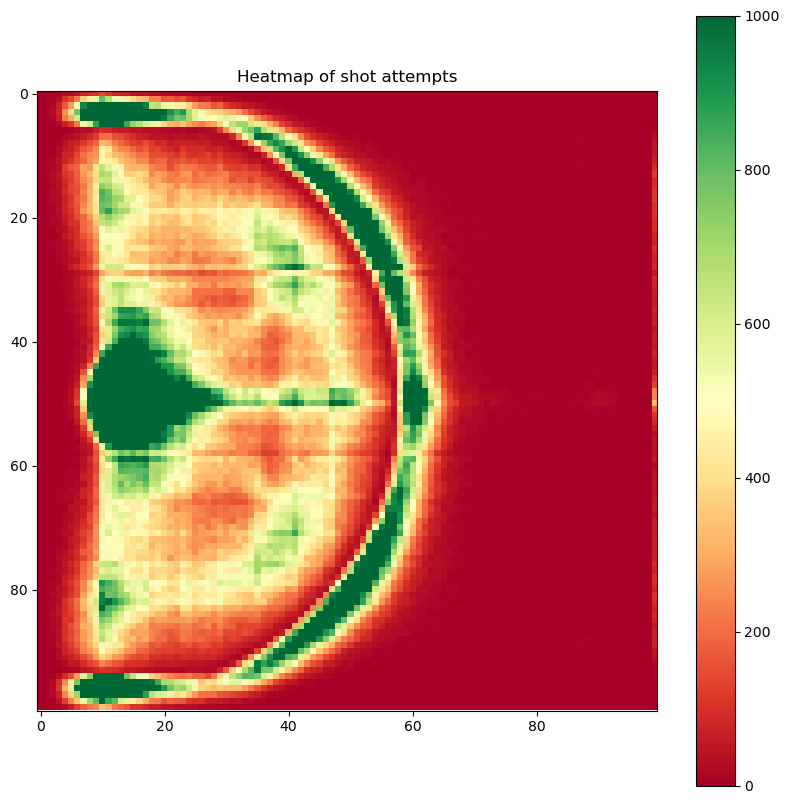

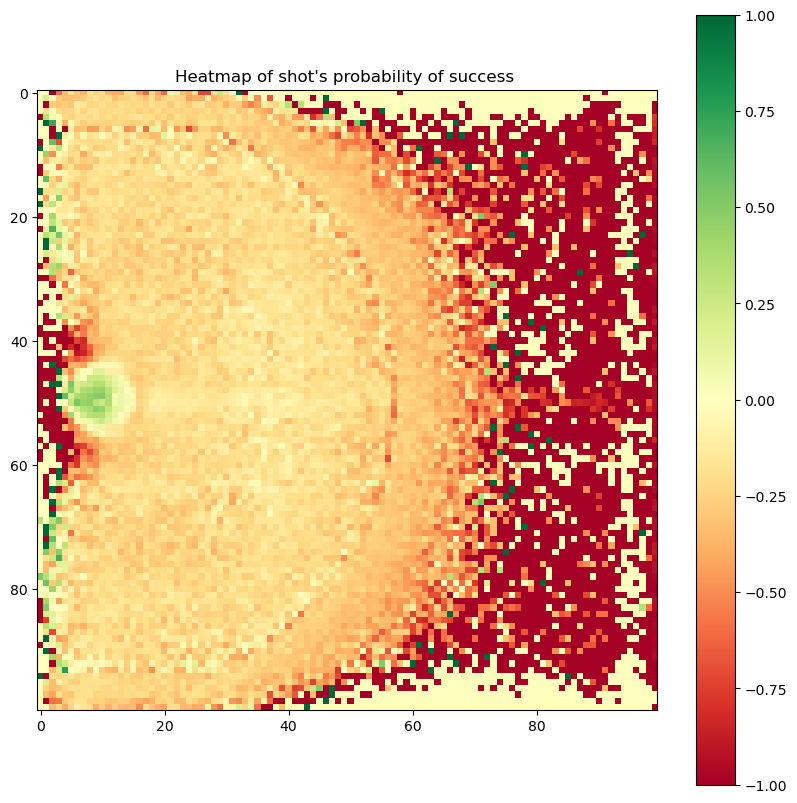

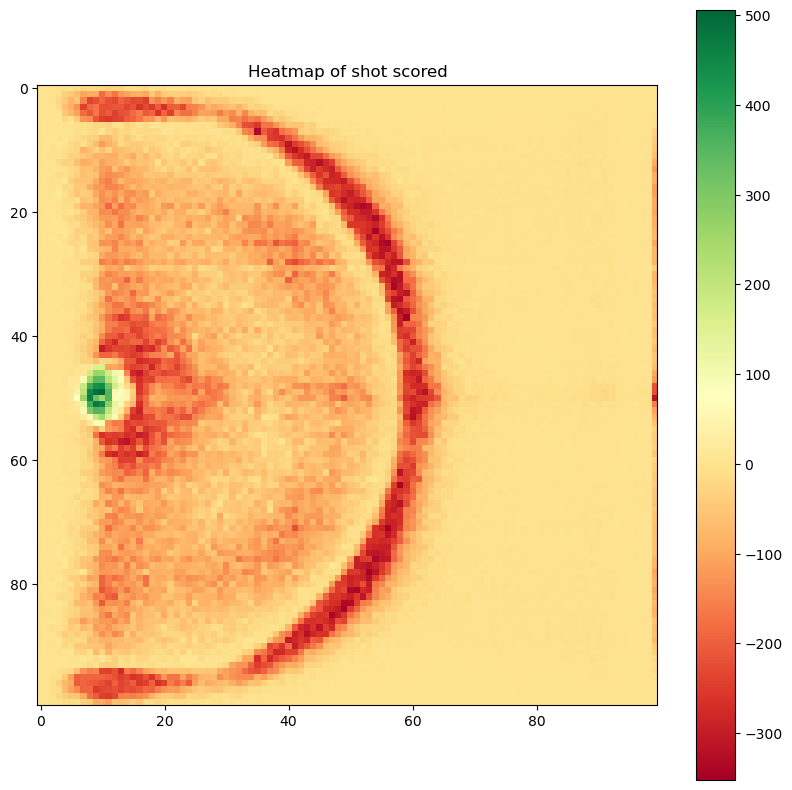

In [21]:
def plot_heatmap(heatmap, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    plt.imshow(heatmap, cmap="RdYlGn")
    plt.colorbar()
    plt.title(title)
    plt.show()


plot_heatmap(heatmap_count, "Heatmap of shot attempts")
plot_heatmap(heatmap_score, "Heatmap of shot's probability of success ")
plot_heatmap(heatmap_score * heatmap_count, "Heatmap of shot scored")

In [22]:
import plotly.express as px

# plot a pie chart of the shots missed and made
shot_made = all_shots["SHOT_MADE"].value_counts()
fig = px.pie(
    shot_made,
    values=shot_made.values,
    names=shot_made.index,
    title="Shots made and missed",
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import plotly.express as px

# plot a pie chart of the shots missed and made
shot_made = all_shots["SHOT_TYPE"].value_counts()
fig = px.pie(
    shot_made,
    values=shot_made.values,
    names=shot_made.index,
    title="Shots Types",
)
fig.show()